<a href="https://colab.research.google.com/github/Ahmed-sakr123/loop/blob/main/Airline_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('/content/Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [28]:
df.isnull().sum().sort_values(ascending=False).head(21)

,0
arr_del15,732
weather_ct,494
arr_delay,494
arr_flights,493
carrier_delay,492
carrier_ct,492
security_delay,490
arr_diverted,490
arr_cancelled,488
nas_delay,488


In [29]:
df.dropna(inplace=True)

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df['weather_delay'].unique()

array([   0.,   35.,   78., ..., 3083., 2798., 2563.])

In [32]:

df['weather_delay'].min(),df['weather_delay'].max()

(0.0, 57707.0)

In [33]:
df['weather_delay']=df['weather_delay'].apply(lambda x:1 if x>100 else 0)

In [34]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,1,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,1,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0,210.0,0.0,37.0


<Axes: xlabel='weather_delay', ylabel='count'>

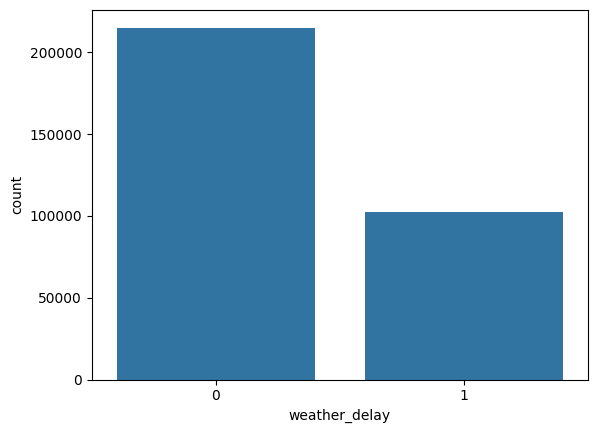

In [35]:
sns.countplot(x='weather_delay',data=df)

In [36]:
df['weather_delay'].value_counts()

,count
weather_delay,
0,215111
1,102150


In [37]:
df.select_dtypes(include='object').columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name'], dtype='object')

In [38]:
df.drop(['carrier_name'],axis=1,inplace=True)
df.drop(['airport_name'],axis=1,inplace=True)



In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['carrier']=le.fit_transform(df['carrier'])
df['airport']=le.fit_transform(df['airport'])

In [42]:
df

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,0,0,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0,4.0,0.0,29.0
1,2022,5,0,4,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0,81.0,0.0,452.0
2,2022,5,0,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0,106.0,0.0,28.0
3,2022,5,0,11,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,0,125.0,0.0,202.0
4,2022,5,0,12,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,7,352,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,1,1023.0,0.0,1579.0
318013,2003,6,7,354,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,1,2132.0,0.0,638.0
318014,2003,6,7,361,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0,607.0,0.0,84.0
318015,2003,6,7,363,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0,210.0,0.0,37.0


In [41]:
X=df.drop(['weather_delay'],axis=1)
y=df['weather_delay']

In [43]:
y

,weather_delay
0,0
1,0
2,0
3,0
4,0
...,...
318012,1
318013,1
318014,0
318015,0


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(253808, 18)
(63453, 18)
(253808,)
(63453,)


In [45]:
import tensorflow as tf
import keras


In [47]:
kerasmodel=keras.models.Sequential([

    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(64,activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')

])



In [49]:
myoptimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Adam',
    amsgrad=False


)

In [54]:
kerasmodel.compile(optimizer=myoptimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
history = kerasmodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=10000,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=10,
        monitor='val_accuracy',
        restore_best_weights=True
    )]
)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5873 - loss: 0.6576 - val_accuracy: 0.6768 - val_loss: 0.6053
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6776 - loss: 0.5940 - val_accuracy: 0.6768 - val_loss: 0.5569
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6854 - loss: 0.5438 - val_accuracy: 0.7676 - val_loss: 0.5085
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7703 - loss: 0.5005 - val_accuracy: 0.7597 - val_loss: 0.4876
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.7616 - loss: 0.4849 - val_accuracy: 0.7731 - val_loss: 0.4774
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7772 - loss: 0.4734 - val_accuracy: 0.7757 - val_loss: 0.4717
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7780 - loss: 0.4703 - val_accuracy: 0.7762 - val_loss: 0.4686
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7805 - loss: 0.4653 - val_accuracy: 0.

In [56]:
print(kerasmodel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,877 (112.80 KB)

 Trainable params: 9,625 (37.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,252 (75.21 KB)

None
